[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Sample Original Text:
 This book was the very first bookmobile book I bought when I was in the school book club. I loved the story then and I bet a dollar to a donut I will love it again. If my memory serves, I bought this book in 5th grade. That would have been about 1961. I am looking forward to reliving the memories.
Sample Cleaned Text:
 book first bookmobile book bought school book club loved story bet dollar donut love memory serf bought book th grade would looking forward reliving memory


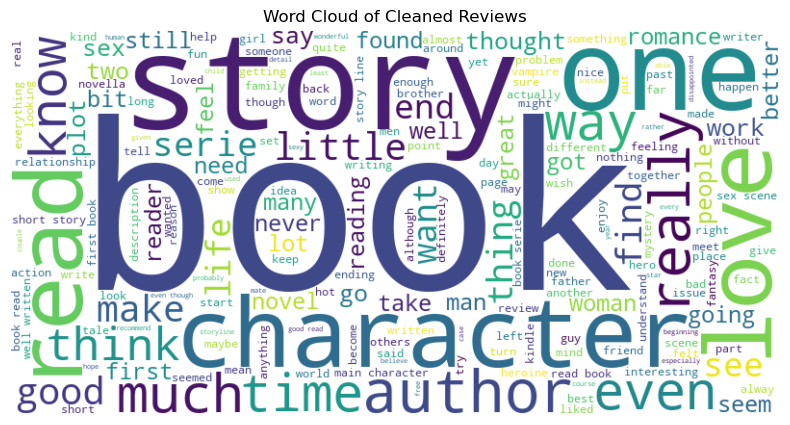

X_train shape: (9600, 165)
X_test shape: (2400, 165)
y_train shape: (9600,)
y_test shape: (2400,)
max_len: 165


In [ ]:

# Import libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import contractions
import pickle

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load dataset
try:
    df = pd.read_csv('Book_review.csv')
except FileNotFoundError:
    print("Error: 'Book_review.csv' not found. Please place it in the same directory.")
    raise

# Prepare data
df['rating'] = df['rating'].astype(int)
df['text'] = df['reviewText']
df = df[['text', 'rating']]

# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = contractions.fix(text)
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|\#\w+|[0-9]+|[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_text)

# Print sample
print("Sample Original Text:\n", df['text'].iloc[0])
print("Sample Cleaned Text:\n", df['cleaned_text'].iloc[0])

# Word cloud
all_text = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Reviews')
plt.savefig('wordcloud.png')
plt.show()

# Tokenization and padding
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['cleaned_text'])
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
sequence_lengths = [len(seq) for seq in sequences]
max_len = int(np.percentile(sequence_lengths, 95))
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Labels (0-based: 1→0, 2→1, 3→2, 4→3, 5→4)
labels = df['rating'].values - 1

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42, stratify=labels
)

# Print shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"max_len: {max_len}")

# Save data
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
with open('max_len.pkl', 'wb') as f:
    pickle.dump(max_len, f)

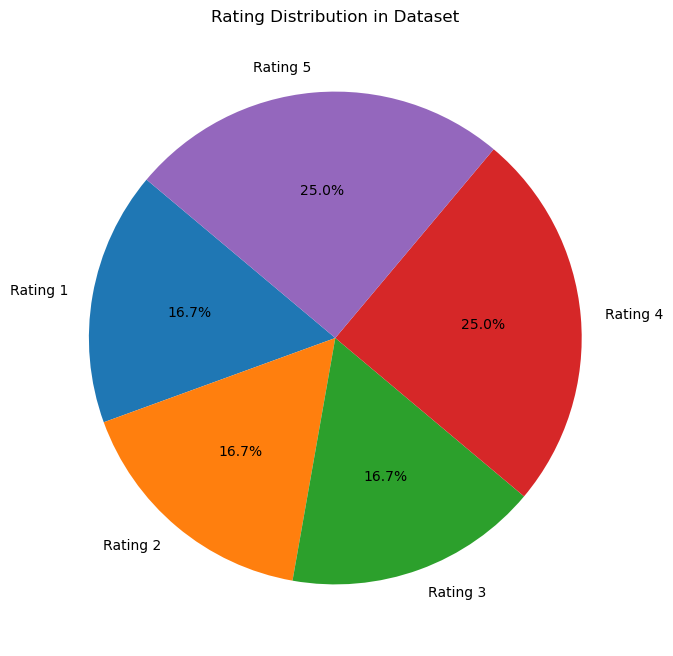

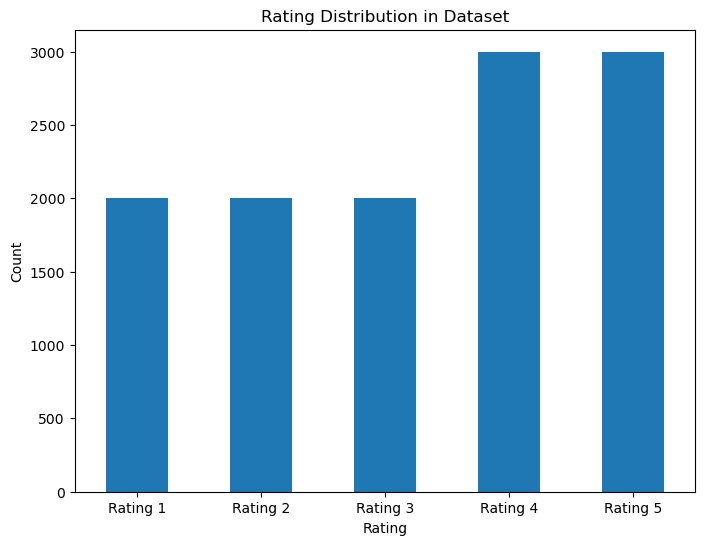

In [ ]:
# Assuming 'df' is the DataFrame with the dataset and a 'rating' column
rating_counts = df['rating'].value_counts().sort_index()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=[f'Rating {i}' for i in rating_counts.index], autopct='%1.1f%%', startangle=140)
plt.title('Rating Distribution in Dataset')
plt.savefig('rating_distribution_pie.png')
plt.show()

# Alternatively, plotting a bar graph
plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar')
plt.title('Rating Distribution in Dataset')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(ticks=range(len(rating_counts)), labels=[f'Rating {i}' for i in rating_counts.index], rotation=0)
plt.savefig('rating_distribution_bar.png')
plt.show()

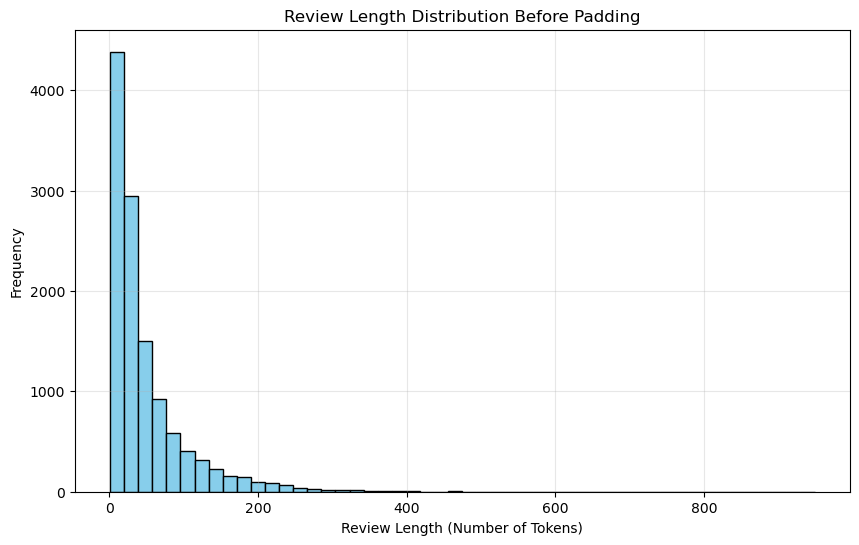

In [ ]:
# Add histogram for review length distribution before padding
plt.figure(figsize=(10, 6))
plt.hist(sequence_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Review Length Distribution Before Padding')
plt.xlabel('Review Length (Number of Tokens)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.savefig('review_length_distribution.png', bbox_inches='tight')
plt.show()

Epoch 1/20


C:\Users\User\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


120/120 ━━━━━━━━━━━━━━━━━━━━ 13s 77ms/step - accuracy: 0.2028 - loss: 1.6875 - val_accuracy: 0.2062 - val_loss: 1.6093 - learning_rate: 0.0010
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.2144 - loss: 1.6095 - val_accuracy: 0.1698 - val_loss: 1.6099 - learning_rate: 0.0010
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - accuracy: 0.2095 - loss: 1.6120 - val_accuracy: 0.2188 - val_loss: 1.6088 - learning_rate: 0.0010
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.2251 - loss: 1.6080 - val_accuracy: 0.2099 - val_loss: 1.6085 - learning_rate: 0.0010
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.2362 - loss: 1.5917 - val_accuracy: 0.3042 - val_loss: 1.5348 - learning_rate: 0.0010
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.3383 - loss: 1.4917 - val_accuracy: 0.3703 - val_loss: 1.3583 - learning_rate: 0.0010
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.4509 - loss: 1.2486 - v

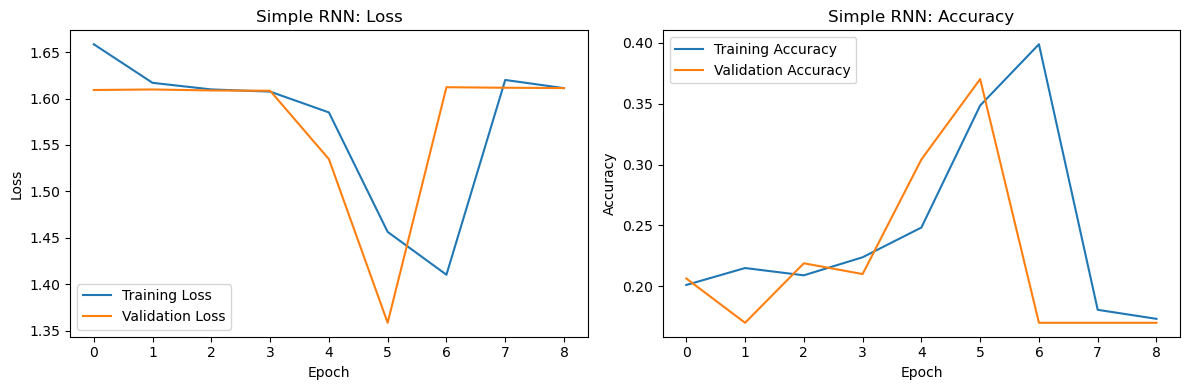

75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
Simple RNN Classification Report:
              precision    recall  f1-score   support

           1       0.35      0.79      0.49       400
           2       0.24      0.11      0.15       400
           3       0.23      0.16      0.19       400
           4       0.41      0.07      0.12       600
           5       0.46      0.71      0.56       600

    accuracy                           0.37      2400
   macro avg       0.34      0.37      0.30      2400
weighted avg       0.35      0.37      0.31      2400



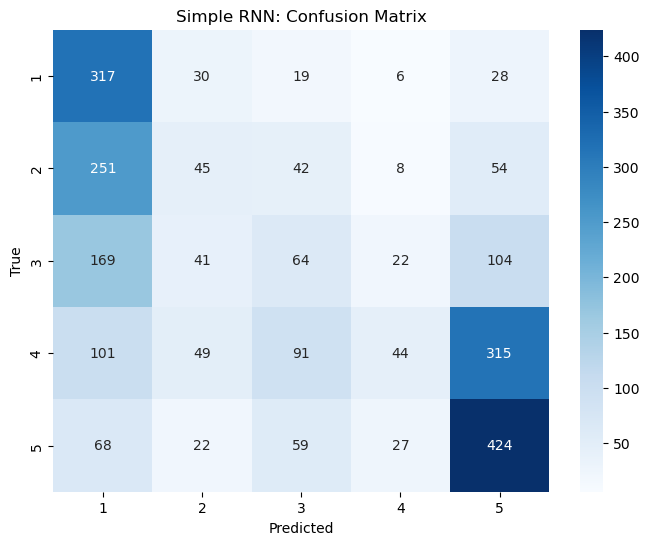

Epoch 1/20


C:\Users\User\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


120/120 ━━━━━━━━━━━━━━━━━━━━ 81s 619ms/step - accuracy: 0.2150 - loss: 1.6073 - val_accuracy: 0.3391 - val_loss: 1.5049 - learning_rate: 0.0010
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 72s 601ms/step - accuracy: 0.3434 - loss: 1.4544 - val_accuracy: 0.4391 - val_loss: 1.2694 - learning_rate: 0.0010
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 72s 596ms/step - accuracy: 0.4846 - loss: 1.1634 - val_accuracy: 0.4391 - val_loss: 1.2577 - learning_rate: 0.0010
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 74s 616ms/step - accuracy: 0.5794 - loss: 0.9775 - val_accuracy: 0.4484 - val_loss: 1.3306 - learning_rate: 0.0010
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 66s 546ms/step - accuracy: 0.6896 - loss: 0.8075 - val_accuracy: 0.4266 - val_loss: 1.4879 - learning_rate: 0.0010
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 66s 554ms/step - accuracy: 0.7608 - loss: 0.6267 - val_accuracy: 0.4583 - val_loss: 1.6634 - learning_rate: 2.0000e-04


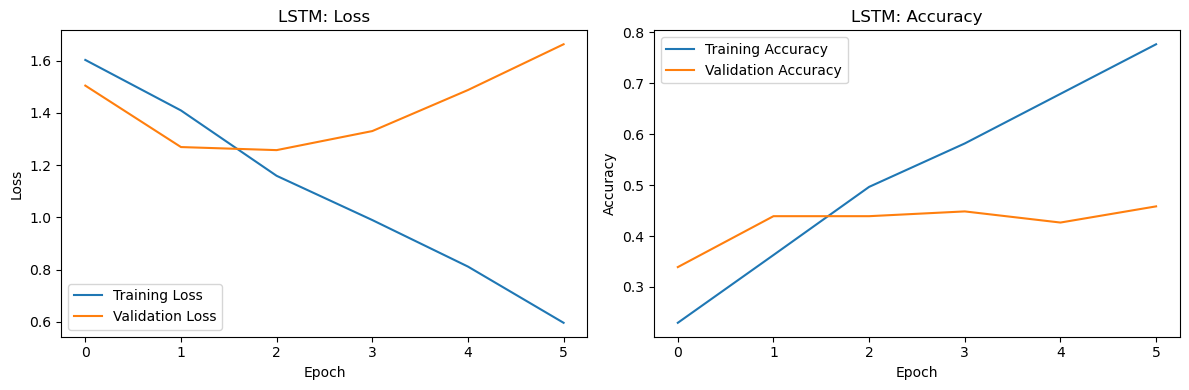

75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step
LSTM Classification Report:
              precision    recall  f1-score   support

           1       0.48      0.62      0.54       400
           2       0.28      0.11      0.15       400
           3       0.28      0.39      0.33       400
           4       0.41      0.40      0.40       600
           5       0.56      0.56      0.56       600

    accuracy                           0.43      2400
   macro avg       0.40      0.41      0.40      2400
weighted avg       0.42      0.43      0.41      2400



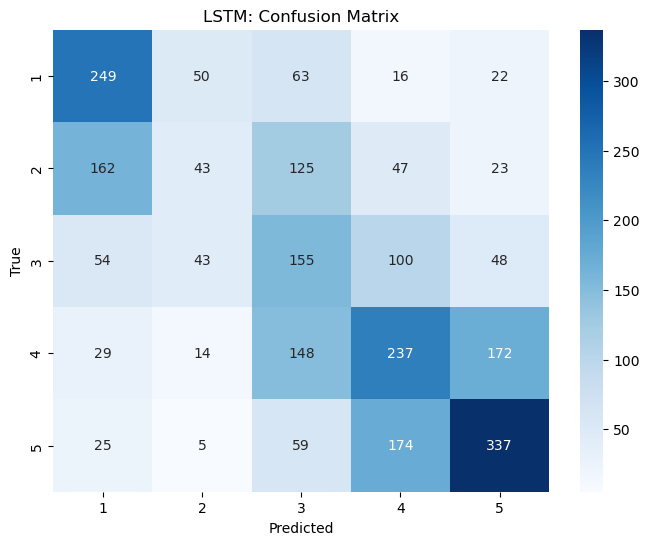

[==================================================] 100.0% 387.1/387.1MB downloaded
Epoch 1/20


C:\Users\User\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


120/120 ━━━━━━━━━━━━━━━━━━━━ 77s 608ms/step - accuracy: 0.2268 - loss: 1.6236 - val_accuracy: 0.3667 - val_loss: 1.3860 - learning_rate: 0.0010
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 73s 607ms/step - accuracy: 0.3623 - loss: 1.4144 - val_accuracy: 0.4161 - val_loss: 1.2995 - learning_rate: 0.0010
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 69s 571ms/step - accuracy: 0.4141 - loss: 1.3139 - val_accuracy: 0.4125 - val_loss: 1.2569 - learning_rate: 0.0010
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 76s 637ms/step - accuracy: 0.4619 - loss: 1.1979 - val_accuracy: 0.4391 - val_loss: 1.2427 - learning_rate: 0.0010
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.5079 - loss: 1.1058 - val_accuracy: 0.4458 - val_loss: 1.2406 - learning_rate: 0.0010
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.5650 - loss: 0.9915 - val_accuracy: 0.4620 - val_loss: 1.2582 - learning_rate: 0.0010
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 87s 722ms/step - accuracy: 0.5989 - loss: 0.9

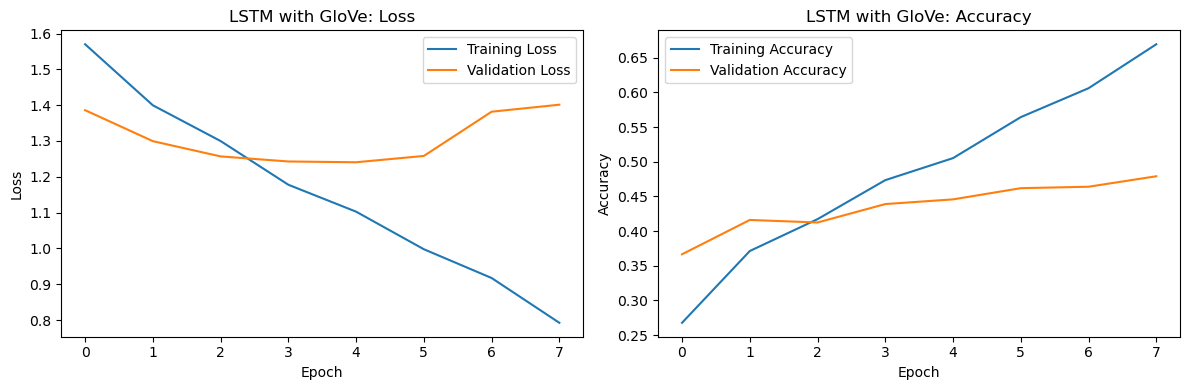

75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step
LSTM with GloVe Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.49      0.53       400
           2       0.35      0.30      0.32       400
           3       0.30      0.56      0.40       400
           4       0.47      0.42      0.45       600
           5       0.66      0.48      0.56       600

    accuracy                           0.45      2400
   macro avg       0.47      0.45      0.45      2400
weighted avg       0.49      0.45      0.46      2400



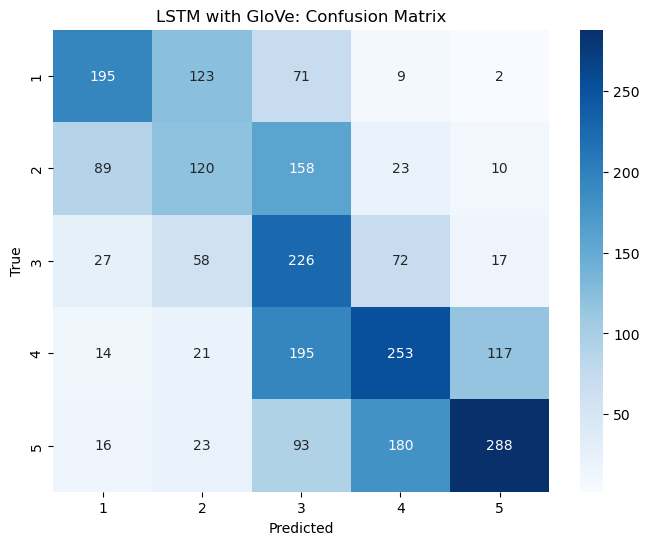

In [ ]:
# Install additional libraries for GloVe embeddings
!pip install gensim jax==0.4.13

# Import libraries
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from gensim.models import KeyedVectors
import gensim.downloader as api
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load preprocessed data from Step 1
X_train = np.load('X_train.npy', allow_pickle=True)
X_test = np.load('X_test.npy', allow_pickle=True)
y_train = np.load('y_train.npy', allow_pickle=True)
y_test = np.load('y_test.npy', allow_pickle=True)
max_words = 10000  # From Step 1
max_len = pickle.load(open('max_len.pkl', 'rb'))
tokenizer = pickle.load(open('tokenizer.pkl', 'rb'))

# Compute class weights (labels are 0-4)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
np.save('class_weight_dict.npy', class_weight_dict)

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# 1. Simple RNN Model
rnn_model = Sequential([
    Embedding(max_words, 100, input_length=max_len),
    Bidirectional(SimpleRNN(128, return_sequences=False)),
    Dropout(0.7),
    Dense(64, activation='relu'),
    Dropout(0.7),
    Dense(5, activation='softmax')
])

rnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

rnn_history = rnn_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Plot Simple RNN training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['loss'], label='Training Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.title('Simple RNN: Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Simple RNN: Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('rnn_training_history.png')
plt.show()

# Evaluate Simple RNN
rnn_y_pred = np.argmax(rnn_model.predict(X_test), axis=1)
print("Simple RNN Classification Report:")
rnn_report = classification_report(y_test, rnn_y_pred, target_names=['1', '2', '3', '4', '5'], output_dict=True)
print(classification_report(y_test, rnn_y_pred, target_names=['1', '2', '3', '4', '5']))

# Simple RNN confusion matrix
cm = confusion_matrix(y_test, rnn_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '2', '3', '4', '5'], yticklabels=['1', '2', '3', '4', '5'])
plt.title('Simple RNN: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('rnn_confusion_matrix.png')
plt.show()

# Save Simple RNN model
rnn_model.save('rnn_rating_model.h5')

# 2. LSTM Model
lstm_model = Sequential([
    Embedding(max_words, 100, input_length=max_len),
    Bidirectional(LSTM(256, return_sequences=False)),
    Dropout(0.7),
    Dense(128, activation='relu'),
    Dropout(0.7),
    Dense(5, activation='softmax')
])

lstm_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Plot LSTM training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM: Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM: Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('lstm_training_history.png')
plt.show()

# Evaluate LSTM
lstm_y_pred = np.argmax(lstm_model.predict(X_test), axis=1)
print("LSTM Classification Report:")
lstm_report = classification_report(y_test, lstm_y_pred, target_names=['1', '2', '3', '4', '5'], output_dict=True)
print(classification_report(y_test, lstm_y_pred, target_names=['1', '2', '3', '4', '5']))

# LSTM confusion matrix
cm = confusion_matrix(y_test, lstm_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '2', '3', '4', '5'], yticklabels=['1', '2', '3', '4', '5'])
plt.title('LSTM: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('lstm_confusion_matrix.png')
plt.show()

# Save LSTM model
lstm_model.save('lstm_rating_model.h5')

# 3. LSTM with GloVe Embeddings
embedding_model = api.load('glove-twitter-100')  # Fallback: 'glove-wiki-gigaword-50'
embedding_dim = 100

# Create embedding matrix
word_index = tokenizer.word_index
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words and word in embedding_model:
        embedding_matrix[i] = embedding_model[word]

# Build LSTM model with GloVe
glove_model = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len,
              weights=[embedding_matrix], trainable=True),
    Bidirectional(LSTM(256, return_sequences=False)),
    Dropout(0.7),
    Dense(128, activation='relu'),
    Dropout(0.7),
    Dense(5, activation='softmax')
])

glove_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

glove_history = glove_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Plot GloVe training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(glove_history.history['loss'], label='Training Loss')
plt.plot(glove_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM with GloVe: Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(glove_history.history['accuracy'], label='Training Accuracy')
plt.plot(glove_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM with GloVe: Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('lstm_glove_training_history.png')
plt.show()

# Evaluate GloVe
glove_y_pred = np.argmax(glove_model.predict(X_test), axis=1)
print("LSTM with GloVe Classification Report:")
glove_report = classification_report(y_test, glove_y_pred, target_names=['1', '2', '3', '4', '5'], output_dict=True)
print(classification_report(y_test, glove_y_pred, target_names=['1', '2', '3', '4', '5']))

# GloVe confusion matrix
cm = confusion_matrix(y_test, glove_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '2', '3', '4', '5'], yticklabels=['1', '2', '3', '4', '5'])
plt.title('LSTM with GloVe: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('lstm_glove_confusion_matrix.png')
plt.show()

# Save GloVe model
glove_model.save('lstm_glove_rating_model.h5')

# Save reports for Step 3
with open('rnn_report.pkl', 'wb') as f:
    pickle.dump(rnn_report, f)
with open('lstm_report.pkl', 'wb') as f:
    pickle.dump(lstm_report, f)
with open('glove_report.pkl', 'wb') as f:
    pickle.dump(glove_report, f)

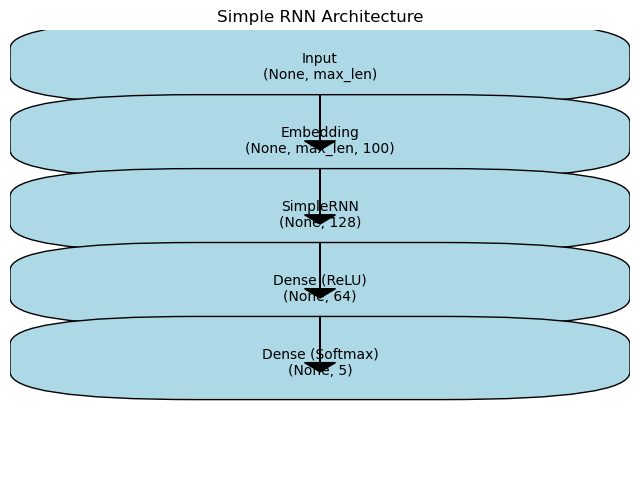

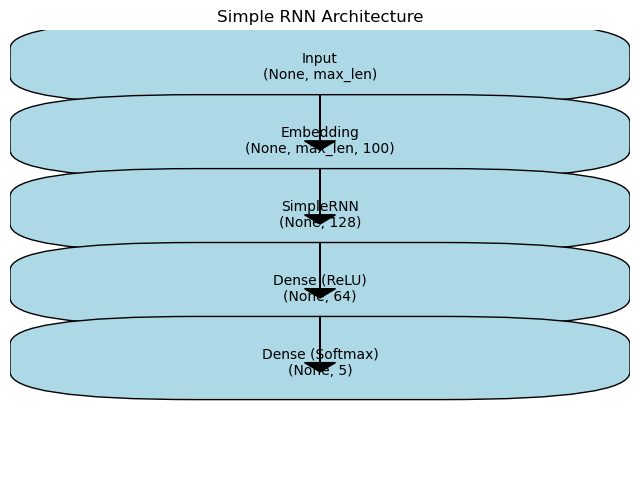

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure
fig, ax = plt.subplots(figsize=(8, 6))

# Define layers
layers = [
    "Input\n(None, max_len)",
    "Embedding\n(None, max_len, 100)",
    "SimpleRNN\n(None, 128)",
    "Dense (ReLU)\n(None, 64)",
    "Dense (Softmax)\n(None, 5)"
]

# Plot each layer as a box
for i, layer in enumerate(layers):
    ax.add_patch(patches.FancyBboxPatch((0.3, 4.5 - i * 0.8), 0.4, 0.3, boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightblue"))
    ax.text(0.5, 4.6 - i * 0.8, layer, ha='center', va='center', fontsize=10)

# Add arrows between layers
for i in range(len(layers) - 1):
    ax.arrow(0.5, 4.3 - i * 0.8, 0, -0.5, head_width=0.05, head_length=0.1, fc='black', ec='black')

# Set plot properties
ax.set_xlim(0, 1)
ax.set_ylim(0, 5)
ax.set_title('Simple RNN Architecture')
ax.axis('off')

# Save and display
plt.savefig('simple_rnn_architecture_manual.png', bbox_inches='tight')
plt.show()

# Display in Jupyter Notebook
from IPython.display import Image
Image('simple_rnn_architecture_manual.png')

plt.figure(figsize=(12, 6))
df_metrics.set_index('Model')[metrics].plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

<Figure size 1200x600 with 0 Axes>

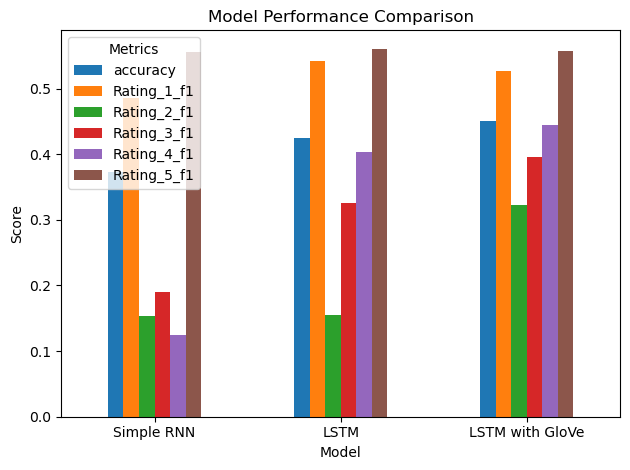

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [ ]:
plt.figure(figsize=(12, 6))
df_metrics.set_index('Model')[metrics].plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<Figure size 1200x600 with 0 Axes>

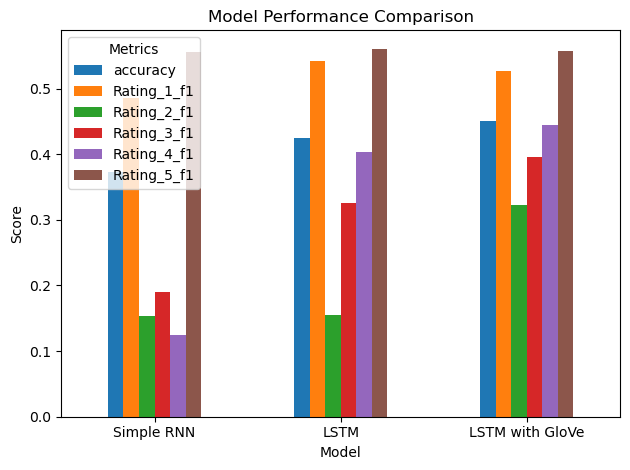

Model Performance Comparison Table:
             Model  accuracy  Rating_1_f1  Rating_2_f1  Rating_3_f1  \
0       Simple RNN  0.372500     0.485452     0.153322     0.189630   
1             LSTM  0.425417     0.541893     0.154955     0.326316   
2  LSTM with GloVe  0.450833     0.526316     0.322148     0.395451   

   Rating_4_f1  Rating_5_f1  
0     0.124470     0.556066  
1     0.403748     0.560732  
2     0.445031     0.557060  


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [ ]:
# Install Gradio
!pip install gradio

# Import libraries for comparison and GUI
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import contractions

# Download NLTK resources for GUI
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Step 3.1: Compare Model Performance
# Load classification reports from Step 2
rnn_report = pickle.load(open('rnn_report.pkl', 'rb'))
lstm_report = pickle.load(open('lstm_report.pkl', 'rb'))
glove_report = pickle.load(open('glove_report.pkl', 'rb'))

# Create DataFrame for comparison
metrics = ['accuracy', 'Rating_1_f1', 'Rating_2_f1', 'Rating_3_f1', 'Rating_4_f1', 'Rating_5_f1']
data = {
    'Model': ['Simple RNN', 'LSTM', 'LSTM with GloVe'],
    'accuracy': [rnn_report['accuracy'], lstm_report['accuracy'], glove_report['accuracy']],
    'Rating_1_f1': [rnn_report['1']['f1-score'], lstm_report['1']['f1-score'], glove_report['1']['f1-score']],
    'Rating_2_f1': [rnn_report['2']['f1-score'], lstm_report['2']['f1-score'], glove_report['2']['f1-score']],
    'Rating_3_f1': [rnn_report['3']['f1-score'], lstm_report['3']['f1-score'], glove_report['3']['f1-score']],
    'Rating_4_f1': [rnn_report['4']['f1-score'], lstm_report['4']['f1-score'], glove_report['4']['f1-score']],
    'Rating_5_f1': [rnn_report['5']['f1-score'], lstm_report['5']['f1-score'], glove_report['5']['f1-score']]
}
df_metrics = pd.DataFrame(data)

# Plot comparison
plt.figure(figsize=(12, 6))
df_metrics.set_index('Model')[metrics].plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

# Display comparison table
print("Model Performance Comparison Table:")
print(df_metrics)

# Step 3.2: Gradio GUI for Real-Time Prediction
# Load model, tokenizer, and max_len
model = load_model('lstm_glove_rating_model.h5')
tokenizer = pickle.load(open('tokenizer.pkl', 'rb'))
max_len = pickle.load(open('max_len.pkl', 'rb'))

# Preprocessing function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = contractions.fix(text)
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|\#\w+|[0-9]+|[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Prediction function for Gradio
def predict_rating(review):
    if not review:
        return "Please enter a review.", None
    cleaned_review = preprocess_text(review)
    sequence = tokenizer.texts_to_sequences([cleaned_review])
    padded_sequence = np.pad(sequence[0], (0, max_len - len(sequence[0])), 'constant')[:max_len]
    padded_sequence = padded_sequence.reshape(1, max_len)
    prediction = model.predict(padded_sequence)
    rating = np.argmax(prediction, axis=1)[0] + 1
    probs = f"Rating 1: {prediction[0][0]:.2f}, Rating 2: {prediction[0][1]:.2f}, Rating 3: {prediction[0][2]:.2f}, Rating 4: {prediction[0][3]:.2f}, Rating 5: {prediction[0][4]:.2f}"
    return f"Predicted Rating: {rating}", probs

# Gradio interface
iface = gr.Interface(
    fn=predict_rating,
    inputs=gr.Textbox(lines=5, label="Enter Review"),
    outputs=[
        gr.Textbox(label="Predicted Rating"),
        gr.Textbox(label="Prediction Probabilities")
    ],
    title="Book Review Rating Prediction",
    description="Enter a book review to predict its rating (1 to 5).",
    allow_flagging="never"
)

# Launch Gradio app (runs inline in Jupyter Notebook)
iface.launch(share=False)